In [2]:
import xarray as xr
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pylab as pl
import matplotlib as mpl
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
import numpy as np
import warnings as wn
from xhistogram.xarray import histogram as xh
%reload_ext autoreload
%autoreload 2
import esm2m.myfunctions as func

In [26]:
cod = pd.read_csv('atlantic_cod.csv', header=0)
bass = pd.read_csv('stripped_bass.csv', header=0)

In [3]:
cod = pd.read_csv('/home/aos/ystochel/esm2m/notebooks/atlantic_cod.csv', header=0)

/home/aos/ystochel/miniconda3/envs/esm2m/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (18,28,39,48,53,74,75,79,108,143,213,224,225,227) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
rootdir = '/local/ss23/NEW_MI'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+'/'+filename
z0_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
z0_avg = z0_all.mean(dim='ensemble')
z0Avg = xr.open_dataset('/home/aos/ystochel/esm2m/data/processed/MI_hitemp_sens_k01_ens130_1x1_1950_2100.nc')

In [17]:
rootdir = '/local/ss23/GFDL_LEs/'
experiment = 'OCN/METABOLIC_INDEX/RCP85'
filename = 'MI_hitemp_sens_k01_ens*_1x1_1950_2100.nc'
path = rootdir+experiment+'/'+filename
z0_all = xr.open_mfdataset(path, engine='netcdf4', concat_dim='ensemble', combine='nested')
z0_avg = z0_all.sel(ensemble=30)
z0_avg = z0_avg/2
z0_all = z0_all.sel(ensemble=slice(0,30))
z0_all = z0_all/2

In [5]:
rootdir = '/local/ss23/GFDL_LEs/'
subdir = 'AREA_FILES_ETC'
filename_area = 'WOA2001_grid.nc'
path_area = rootdir+subdir+'/'+filename_area
area = xr.open_dataset(path_area)['AREA'].rename({'latitude':'yt_ocean','longitude':'xt_ocean'})
# area = area.assign_coords({'xt_ocean':z0_avg['xt_ocean'],'yt_ocean':z0_avg['yt_ocean']})
# oceanmask = np.isfinite(z0_avg['MI'].isel(time=0).squeeze())
# area_masked = area.where(oceanmask,np.nan)
# ds_total = ~np.isnan(area.where(oceanmask))
# total = ds_total.sum(dim='yt_ocean').sum(dim='xt_ocean')

# Atlantic Cod
#### MI crit 2.1-2.2

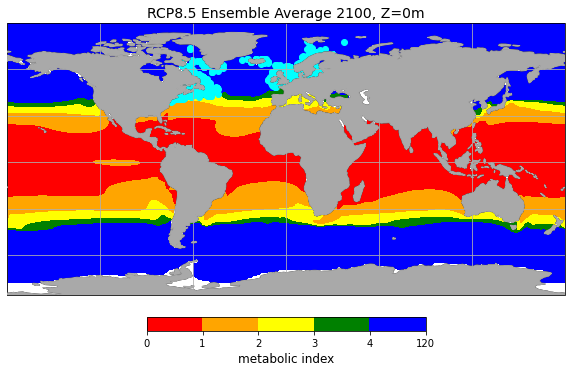

In [28]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':crs})
# coords = [-80.5,45.5,30.5,80.5]
func.graph(z0Avg, ax, 'RCP8.5 Ensemble Average 2100, Z=0m', 2100, None, False)
ax.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')

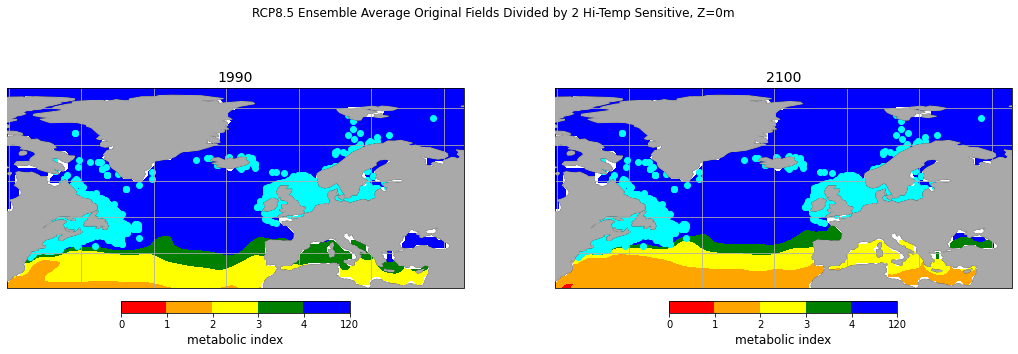

In [25]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,5),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Original Fields Divided by 2 Hi-Temp Sensitive, Z=0m')
coords = [-80.5,45.5,30.5,80.5]
func.graph(z0Avg, ax0, '1990', 1990, coords, False)
ax0.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')
func.graph(z0Avg, ax1, '2100', 2100, coords, False)
ax1.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')

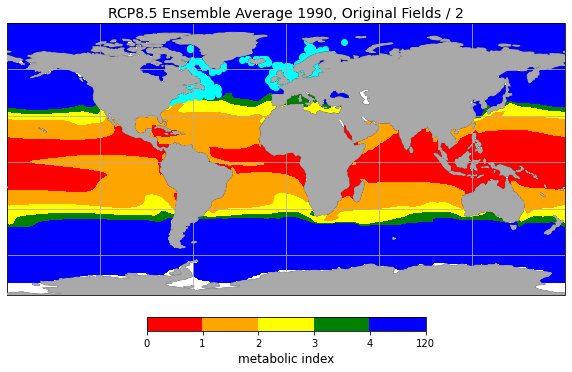

In [19]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':crs})
# coords = [-80.5,45.5,30.5,80.5]
func.graph(z0_avg, ax, 'RCP8.5 Ensemble Average 1990, Original Fields / 2', 1990, None, False)
ax.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')

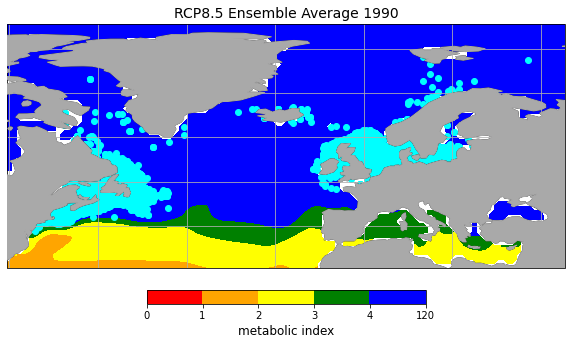

In [18]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':crs})
coords = [-80.5,45.5,30.5,80.5]
func.graph(z0Avg, ax, 'RCP8.5 Ensemble Average 1990', 1990, coords, False)
ax.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')

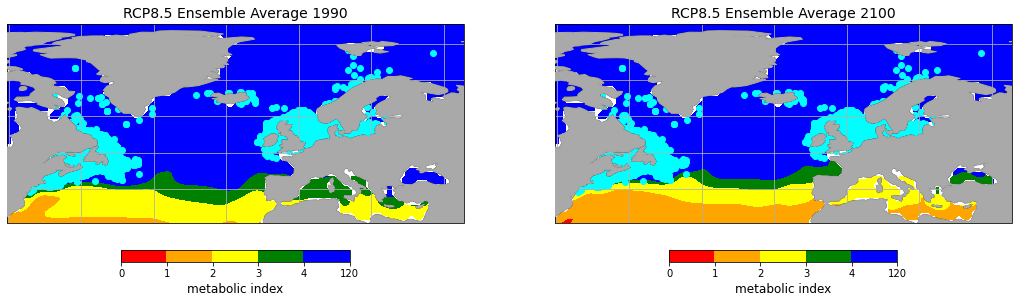

In [15]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,10),nrows=1,ncols=2,subplot_kw={'projection':crs})
coords = [-80.5,45.5,30.5,80.5]
func.graph(z0Avg, ax0, 'RCP8.5 Ensemble Average 1990', 1990, coords, False)
ax0.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')
func.graph(z0Avg, ax1, 'RCP8.5 Ensemble Average 2100', 2100, coords, False)
ax1.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')

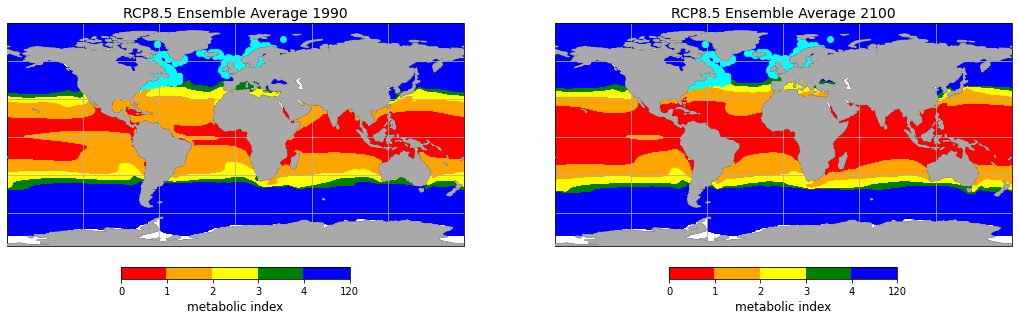

In [31]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(18,8),nrows=1,ncols=2,subplot_kw={'projection':crs})
func.graph(z0Avg, ax0, 'RCP8.5 Ensemble Average 1990', 1990, None, False)
ax0.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')
func.graph(z0Avg, ax1, 'RCP8.5 Ensemble Average 2100', 2100, None, False)
ax1.scatter(cod['decimalLongitude'], cod['decimalLatitude'],color='aqua')

In [43]:
cod['decimalLongitude']

0       -55.5000
1        20.2367
2         5.7667
3         9.1500
4       -50.5400
          ...   
18053    10.5167
18054   -53.7300
18055    14.4900
18056     3.6667
18057   -50.5200
Name: decimalLongitude, Length: 18058, dtype: float64

Text(0.5, 0, 'longitude')

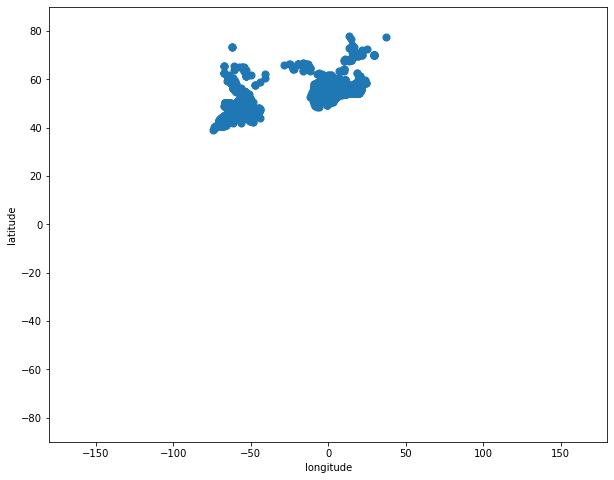

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(cod['decimalLongitude'], cod['decimalLatitude'], s=50)
ax.set_ylim(-90,90)
ax.set_xlim(-180,180)
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')

# Stripped Bass
#### MI crit 4.8-5

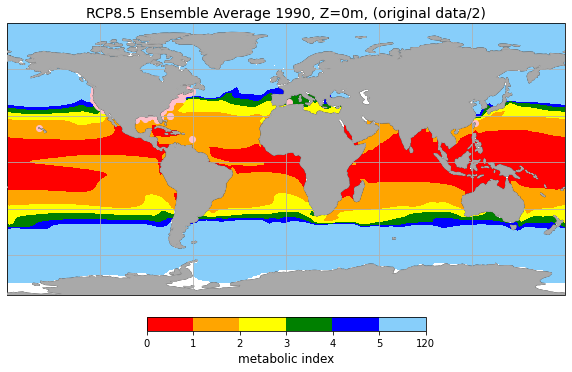

In [50]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':crs})
# coords = [-80.5,45.5,30.5,80.5]
func.graph(z0_avg, ax, 'RCP8.5 Ensemble Average 1990, Z=0m, (original data/2)', 1990, None, False)
ax.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='pink')

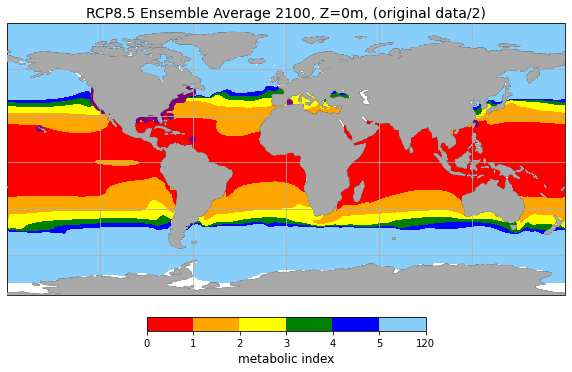

In [37]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, ax = plt.subplots(figsize=(10,8),subplot_kw={'projection':crs})
# coords = [-80.5,45.5,30.5,80.5]
func.graph(z0_avg, ax, 'RCP8.5 Ensemble Average 2100, Z=0m, (original data/2)', 2100, None, False)
ax.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='purple')

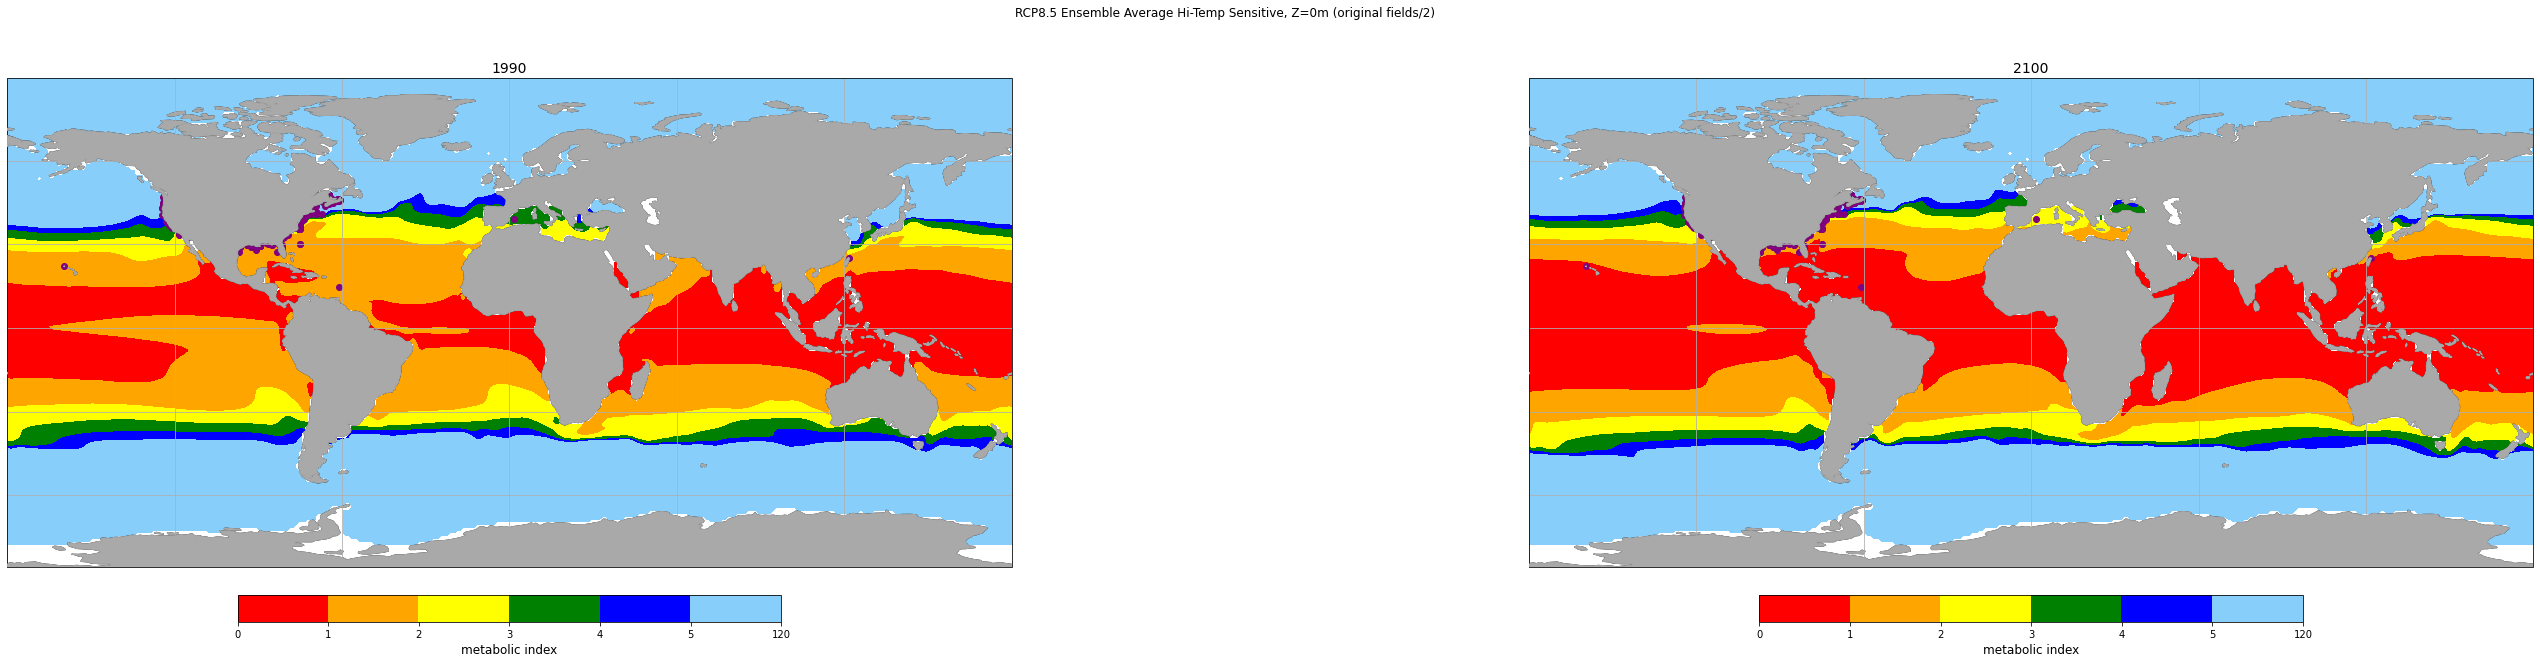

In [49]:
crs = ccrs.PlateCarree()
wn.filterwarnings('ignore')
fig, (ax0,ax1) = plt.subplots(figsize=(50,10),nrows=1,ncols=2,subplot_kw={'projection':crs})
fig.suptitle('RCP8.5 Ensemble Average Hi-Temp Sensitive, Z=0m (original fields/2)')
# coords = [-80.5,45.5,30.5,80.5]
func.graph(z0_avg, ax0, '1990', 1990, None, False)
ax0.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='purple')
func.graph(z0_avg, ax1, '2100', 2100, None, False)
ax1.scatter(bass['decimalLongitude'], bass['decimalLatitude'],color='purple')